By: 顾 瞻 GU Zhan (Sam)

July 2017

# [2] Data pre-porcessing
Explore and visualize data

In [1]:
# from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import operator
from scipy import interp
from itertools import cycle
from sklearn import svm
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from statsmodels.graphics.mosaicplot import mosaic
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# from sklearn import svm

# [3] Modeling Part 2: Python scikit-learn

### Models to use:

* GradientBoostingClassifier
* RandomForestClassifier
* AdaBoostClassifier
* ExtraTreesClassifier
* BaggingClassifier
* LogisticRegression
* SVM kernal RBF
* SVM kernal Linear
* KNeighborsClassifier


### Import pre-processed data

In [3]:
df_wnv_raw = pd.read_csv('bid_v007_ReScale.csv', encoding='utf-8') 
df_wnv_raw.head()

,target.7sec,ccyyy.mm.curr,ccyyy.mm.prev,bid.time,bid.sec,month,bid.curr.mth,increment.curr.mth,MV.3sec.curr,MV.5sec.curr,...,R01_Volume.Bidder.curr.mth,R01_success.ratio.curr.mth,R01_Volume.Plate.prev.mth,R01_Volume.Bidder.prev.mth,R01_success.ratio.prev.mth,R01_d.Volume.Plate,R01_d.Volume.Bidder,R01_d.success.ratio,R01_anomaly,R01_target.7sec
0,0,2016-01,2015-12,11:29:35,35,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.000000
1,0,2016-01,2015-12,11:29:36,36,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.000000
2,100,2016-01,2015-12,11:29:37,37,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.071429
3,100,2016-01,2015-12,11:29:38,38,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.071429
4,100,2016-01,2015-12,11:29:39,39,1,81800,0,0.0,0.0,...,0.0,0.678037,0.0,0.0,0.290318,0.675811,0.611385,0.867524,0.0,0.071429


### Include relevant features

In [76]:
X = df_wnv_raw[[
'R01_bid.sec',
'R01_month',
'R01_bid.curr.mth',
'R01_increment.curr.mth',
'R01_MV.3sec.curr',
'R01_MV.5sec.curr',
'R01_MV.3sec.curr.d.Avg.Low.prev.mth',
'R01_MV.5sec.curr.d.Avg.Low.prev.mth',
'R01_bid.prev.mth',
'R01_increment.prev.mth',
'R01_MV.3sec.prev',
'R01_MV.5sec.prev',
'R01_MV.3sec.prev.d.Avg.Low.prev.mth',
'R01_MV.5sec.prev.d.Avg.Low.prev.mth',
'R01_d.Avg.Low.prev.mth',
'R01_increment.curr.mth.d.Avg.Low.prev.mth',
'R01_d.earliest.success.time.sec.prev.mth',
'R01_Volume.Plate.curr.mth',
'R01_Volume.Bidder.curr.mth',
'R01_success.ratio.curr.mth',
'R01_Volume.Plate.prev.mth',
'R01_Volume.Bidder.prev.mth',
'R01_success.ratio.prev.mth',
'R01_d.Volume.Plate',
'R01_d.Volume.Bidder',
'R01_d.success.ratio',
'R01_anomaly',
# 'R01_target.7sec'
        ]]

X_col = X.columns # get the column list
# X = StandardScaler().fit_transform(X.as_matrix())
X = X.as_matrix()
y = df_wnv_raw[['R01_target.7sec']].as_matrix().reshape(len(df_wnv_raw),)

In [77]:
X_col

Index(['R01_bid.sec', 'R01_month', 'R01_bid.curr.mth',
       'R01_increment.curr.mth', 'R01_MV.3sec.curr', 'R01_MV.5sec.curr',
       'R01_MV.3sec.curr.d.Avg.Low.prev.mth',
       'R01_MV.5sec.curr.d.Avg.Low.prev.mth', 'R01_bid.prev.mth',
       'R01_increment.prev.mth', 'R01_MV.3sec.prev', 'R01_MV.5sec.prev',
       'R01_MV.3sec.prev.d.Avg.Low.prev.mth',
       'R01_MV.5sec.prev.d.Avg.Low.prev.mth', 'R01_d.Avg.Low.prev.mth',
       'R01_increment.curr.mth.d.Avg.Low.prev.mth',
       'R01_d.earliest.success.time.sec.prev.mth', 'R01_Volume.Plate.curr.mth',
       'R01_Volume.Bidder.curr.mth', 'R01_success.ratio.curr.mth',
       'R01_Volume.Plate.prev.mth', 'R01_Volume.Bidder.prev.mth',
       'R01_success.ratio.prev.mth', 'R01_d.Volume.Plate',
       'R01_d.Volume.Bidder', 'R01_d.success.ratio', 'R01_anomaly'],
      dtype='object')

# [4] Evaluation
### K-fold Cross-Validation

In [78]:
rng = check_random_state(0)

In [79]:
# GB
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score:  (AUC 0.77018), learning_rate=0.005, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score:  (AUC 0.80), learning_rate=0.003, max_features=8
classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608 (AUC 0.81419), learning_rate=0.001, max_features=8 <<< Best
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score:  (AUC 0.82), learning_rate=0.0005, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score:  (AUC 0.82), learning_rate=0.0001, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score:  (AUC 0.82), learning_rate=0.0001, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score:  (AUC 0.82), learning_rate=0.0005, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score: 0.78735 (AUC 0.76840), learning_rate=0.0005, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=200, # score: 0.94608 (AUC 0.78), learning_rate=0.0005, max_depth=4, min_samples_split=30, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.66030, default learning_rate=0.1
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.88464 (AUC 0.80), learning_rate=0.0035
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.85208 (AUC 0.72), learning_rate=0.0035, max_depth=5, min_samples_split=20, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.90691 (AUC 0.80), learning_rate=0.002
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=20
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=30
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=30, max_features=10
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=30, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=4, min_samples_split=30, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score: 0.79112 (AUC 0.70), learning_rate=0.0035, max_depth=5, min_samples_split=30, max_features=10
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=30, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score: 0.63623, default learning_rate=0.1
# classifier_GB = GradientBoostingClassifier(n_estimators=2000, # score: 0.77567, learning_rate=0.0035
#                                    loss='deviance',
#                                    subsample=1,
#                                    max_depth=5,
#                                    min_samples_split=20,
                                   learning_rate=0.001,
                                   max_features=8,
                                   random_state=rng)

In [144]:
# GB
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score:  (AUC 0.77018), learning_rate=0.005, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score:  (AUC 0.80), learning_rate=0.003, max_features=8
classifier_GB = GradientBoostingRegressor(n_estimators=1500, # score: 0.94608 (AUC 0.81419), learning_rate=0.001, max_features=8 <<< Best
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score:  (AUC 0.82), learning_rate=0.0005, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score:  (AUC 0.82), learning_rate=0.0001, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score:  (AUC 0.82), learning_rate=0.0001, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score:  (AUC 0.82), learning_rate=0.0005, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score: 0.78735 (AUC 0.76840), learning_rate=0.0005, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=200, # score: 0.94608 (AUC 0.78), learning_rate=0.0005, max_depth=4, min_samples_split=30, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.66030, default learning_rate=0.1
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.88464 (AUC 0.80), learning_rate=0.0035
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.85208 (AUC 0.72), learning_rate=0.0035, max_depth=5, min_samples_split=20, max_features=8
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.90691 (AUC 0.80), learning_rate=0.002
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=20
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=30
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=30, max_features=10
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=30, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005, max_depth=4, min_samples_split=30, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score: 0.79112 (AUC 0.70), learning_rate=0.0035, max_depth=5, min_samples_split=30, max_features=10
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score: 0.94608, learning_rate=0.0005, max_depth=5, min_samples_split=30, max_features=5
# classifier_GB = GradientBoostingClassifier(n_estimators=1000, # score: 0.63623, default learning_rate=0.1
# classifier_GB = GradientBoostingClassifier(n_estimators=2000, # score: 0.77567, learning_rate=0.0035
#                                    loss='deviance',
#                                    subsample=1,
#                                    max_depth=5,
#                                    min_samples_split=20,
                                   learning_rate=0.002,
#                                    max_features=10,
                                   random_state=rng)

In [139]:
# AB
# classifier_AB = AdaBoostClassifier(n_estimators=100, # score: (AUC 0.81618), learning_rate=0.004
# classifier_AB = AdaBoostClassifier(n_estimators=500, # score: 0.94608 (AUC 0.88), learning_rate=0.005
# classifier_AB = AdaBoostClassifier(n_estimators=1000, # score:  (AUC 0.87), learning_rate=0.01
# classifier_AB = AdaBoostClassifier(n_estimators=1000, # score:  (AUC 0.88), learning_rate=0.0075
# classifier_AB = AdaBoostClassifier(n_estimators=1000, # score:  (AUC 0.75), learning_rate=0.0001 <<< pre-matured
# classifier_AB = AdaBoostClassifier(n_estimators=1000, # score:  (AUC 0.88), learning_rate=0.005
# classifier_AB = AdaBoostClassifier(n_estimators=1000, # score:  (AUC 0.88), learning_rate=0.0025
# classifier_AB = AdaBoostClassifier(n_estimators=500, # score: 0.94608 (AUC 0.88), learning_rate=0.0035
# classifier_AB = AdaBoostClassifier(n_estimators=100, # score: 0.94608 (AUC 0.77), learning_rate=0.002
# classifier_AB = AdaBoostClassifier(n_estimators=500, # score: 0.94608 (AUC 0.85), learning_rate=0.002
# classifier_AB = AdaBoostClassifier(n_estimators=500, # score: 0.94608, learning_rate=0.0005
# classifier_AB = AdaBoostClassifier(n_estimators=1000, # score: 0.943130082 (AUC 0.88207), learning_rate=0.0035
classifier_AB = AdaBoostRegressor(n_estimators=1500, # score: 0.93948 (AUC 0.88339), learning_rate=0.004 <<< Best
# classifier_AB = AdaBoostClassifier(n_estimators=1500, # score: 0.92686 (AUC 0.88), learning_rate=0.0035 
# classifier_AB = AdaBoostClassifier(n_estimators=2000, # score: 0.63941, default learning_rate=0.1
# classifier_AB = AdaBoostClassifier(n_estimators=2000, # score: 0.90117 (AUC 0.87984), learning_rate=0.0035
# classifier_AB = AdaBoostClassifier(n_estimators=2000, # score: 0.89056 (AUC 0.88), learning_rate=0.004
# classifier_AB = AdaBoostClassifier(n_estimators=2000, # score: 0.83374 (AUC 0.83), learning_rate=0.01
                                   learning_rate=0.002,
                                   random_state=rng)

In [138]:
# RF
# classifier_RF = RandomForestClassifier(n_estimators=100, # score:  (AUC 0.66888), max_depth=8, min_samples_split=20,
# classifier_RF = RandomForestClassifier(n_estimators=500, # score: 0.90469, max_depth=5, min_samples_split=20,
# classifier_RF = RandomForestClassifier(n_estimators=500, # score: 0.90540, max_depth=5, min_samples_split=30,
# classifier_RF = RandomForestClassifier(n_estimators=500, # score: 0.93005, max_depth=4, min_samples_split=30,
# classifier_RF = RandomForestClassifier(n_estimators=500, # score: 0.93099, max_depth=4, min_samples_split=40,
# classifier_RF = RandomForestClassifier(n_estimators=500, # score: 0.93794 (AUC 0.82), max_depth=3, min_samples_split=20,
# classifier_RF = RandomForestClassifier(n_estimators=200, # score: 0.93771, max_depth=3, min_samples_split=20,
# classifier_RF = RandomForestClassifier(n_estimators=1000, # score: 0.90493, max_depth=5, min_samples_split=30,
classifier_RF = RandomForestRegressor(n_estimators=1500, # score: 0.94207 (AUC 0.81870), max_depth=3, min_samples_split=20, <<< Best
# classifier_RF = RandomForestClassifier(n_estimators=500, # score: 0.88900, max_depth=5, min_samples_split=30, max_features=10
# classifier_RF = RandomForestClassifier(n_estimators=1000, # score: 0.88864, max_depth=5, min_samples_split=30, max_features=10
# classifier_RF = RandomForestClassifier(n_estimators=500, # score: 0.77154
# classifier_RF = RandomForestClassifier(n_estimators=1000, # score: 0.76469
# classifier_RF = RandomForestClassifier(n_estimators=2000, # score: 0.76564
#                                     max_features=10,
#                                     max_depth=3,
#                                     min_samples_split=20,
                                    random_state=rng)

In [165]:
# ET
# classifier_ET = ExtraTreesClassifier(n_estimators=500, # score: 0.70973
# classifier_ET = ExtraTreesClassifier(n_estimators=500, # score: 0.93382 (AUC 0.81), max_depth=5, min_samples_split=30, max_features=10
classifier_ET = ExtraTreesRegressor(n_estimators=1500, # score: 0.94655 (AUC 0.84364), max_depth=3, min_samples_split=20, max_features=10 <<< Best
# classifier_ET = ExtraTreesClassifier(n_estimators=1000, # score: 0.93276, max_depth=5, min_samples_split=30, max_features=10
# classifier_ET = ExtraTreesClassifier(n_estimators=1000, # score: 0.94572, max_depth=4, min_samples_split=30, max_features=5
# classifier_ET = ExtraTreesClassifier(n_estimators=1000, # score: 0.94608 (AUC 0.82), max_depth=3, min_samples_split=30, max_features=5
# classifier_ET = ExtraTreesClassifier(n_estimators=1000, # score:  (AUC 0.84077), max_depth=3, min_samples_split=20, max_features=10
# classifier_ET = ExtraTreesClassifier(n_estimators=1000, # score: 0.93241, max_depth=5, min_samples_split=20, max_features=10
# classifier_ET = ExtraTreesClassifier(n_estimators=1000, # score: 0.71067
# classifier_ET = ExtraTreesClassifier(n_estimators=2000, # score: 0.71149
#                                     max_depth=3,
#                                     min_samples_split=20,
#                                     max_features=10,
                                    random_state=rng)

In [166]:
# BG
# classifier_BG = BaggingClassifier(n_estimators=500, # score: 0.77035, max_features=20
# classifier_BG = BaggingClassifier(n_estimators=500, # score: 0.78085 (AUC 0.57037), max_features=10
classifier_BG = BaggingRegressor(n_estimators=500, # score: 0.70725 (AUC 0.63729) <<< Best
# classifier_BG = BaggingClassifier(n_estimators=200, # score: 0.77707, max_features=10
# classifier_BG = BaggingClassifier(n_estimators=1000, # score: 0.78096 (AUC 0.56), max_features=10
# classifier_BG = BaggingClassifier(n_estimators=2000, # score:  (AUC 0.51506), max_features=10
# classifier_BG = BaggingClassifier(n_estimators=500, # score: 0.76553, max_features=5
# classifier_BG = BaggingClassifier(n_estimators=500, # score: 0.70181
# classifier_BG = BaggingClassifier(n_estimators=1000, # score: 0.69779
# classifier_BG = BaggingClassifier(n_estimators=2000, # score: 0.70004
#                                     max_features=10,
                                    random_state=rng)

### LR

In [167]:
classifier_LR = LinearRegression() # score: 0.90199 (AUC 0.80569)
# plot_roc(classifier_LR)

### SVC Linear

In [178]:
# classifier_SVCL = svm.SVC(kernel='linear', probability=True, random_state=rng) # score: 0.89976 (AUC 0.70524)
classifier_SVRL = svm.SVR() # score: 0.89976 (AUC 0.70524)
# plot_roc(classifier_SVCL)

### SVC RBF

In [169]:
# classifier_SVCR = svm.SVC(kernel='rbf', probability=True, random_state=rng) # score: 0.80188 (AUC 0.50050)
# classifier_SVRR = svm.SVR(kernel='rbf') # score: 0.80188 (AUC 0.50050)
classifier_SVRR = svm.SVR(kernel='rbf') # score: 0.80188 (AUC 0.50050)
# plot_roc(classifier_SVCR)

### Select Model

In [187]:
# classifier = classifier_GB   # 0.07854768301
# classifier = classifier_AB   # 0.0846678136924
# classifier = classifier_RF   # 0.0791521661296
classifier = classifier_ET   # 0.0743745076978
# classifier = classifier_BG   # 0.0787926960258
# classifier = classifier_LR     # 0.0846378641917 (171079173108.0)
# classifier = classifier_SVRL # 0.0964908184664
# classifier = classifier_SVRR # 0.0964908184664


### Split Data

In [189]:
n_splits=19 # 19 seconds/records for each bidding month
n_fold = 19
# batch = 18 # range [1, 18]

# X_train_1 = X[0:(len(X)-batch*n_splits)]
# y_train_1 = y[0:(len(X)-batch*n_splits)]

# X_test_1 = X[(len(X)-batch*n_splits):((len(X)-batch*n_splits)+n_splits)]
# y_test_1 = y[(len(X)-batch*n_splits):((len(X)-batch*n_splits)+n_splits)]


### CV

342
323
304
285
266
247
228
209
190
171
152


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


133


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


114


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


95


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


76


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


57


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


38


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


19


/home/user/env_py3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/user/env_py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


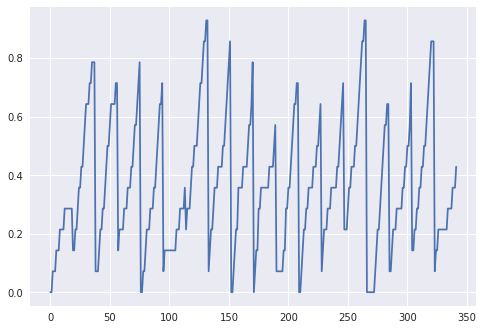

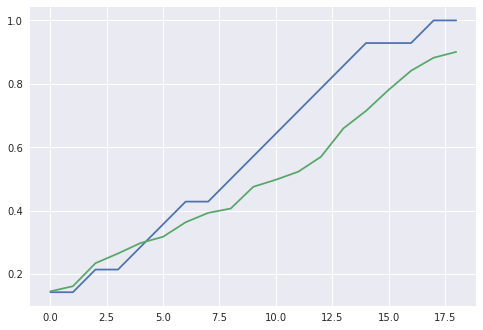

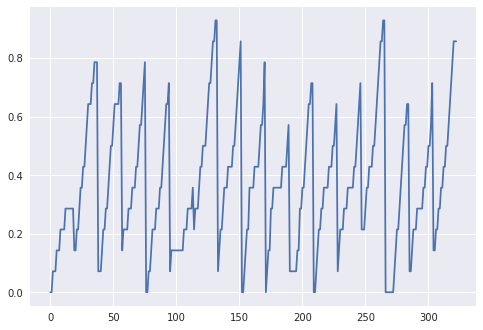

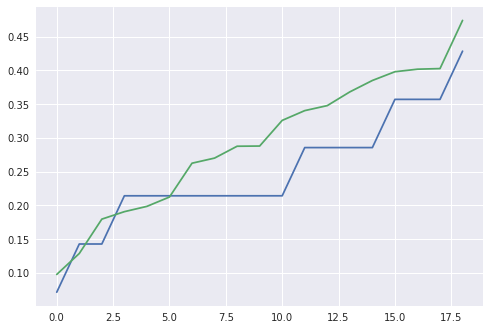

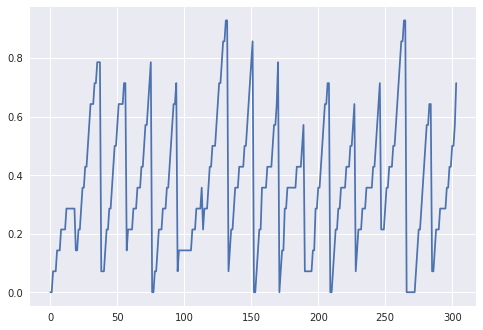

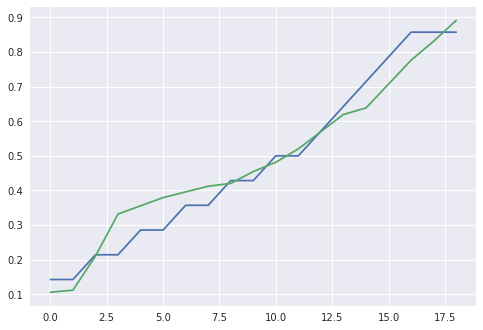

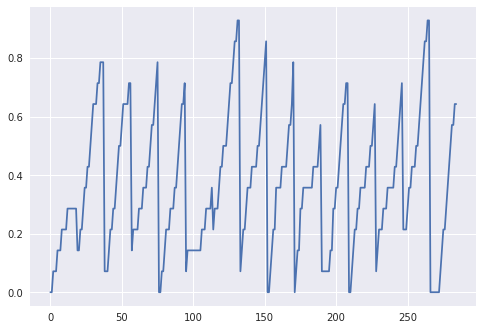

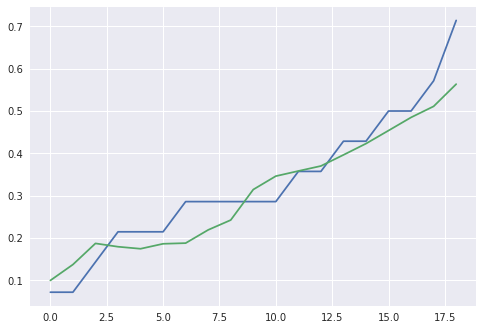

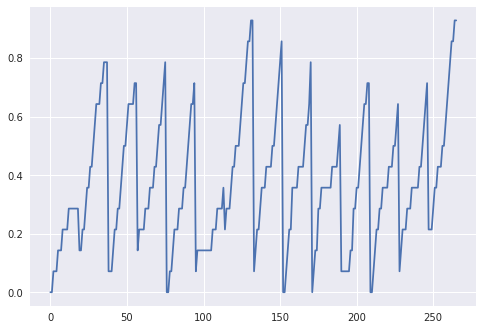

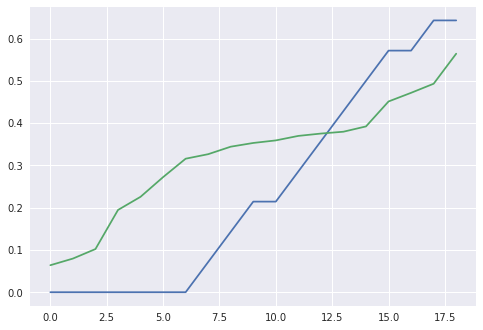

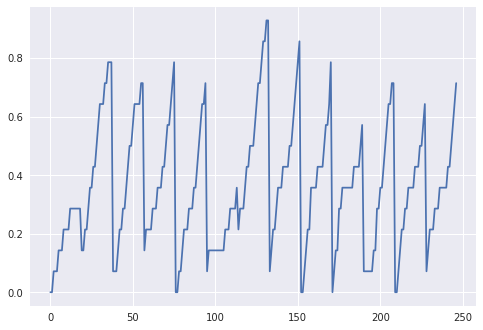

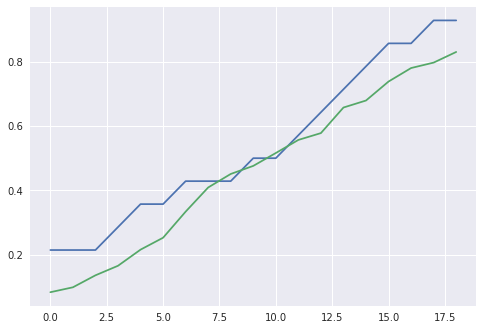

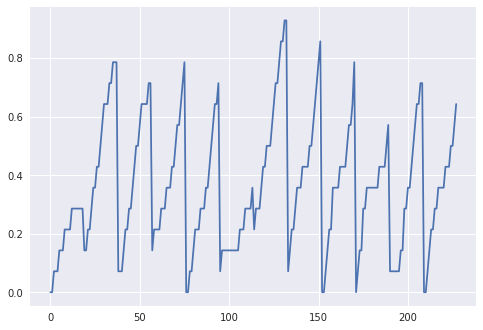

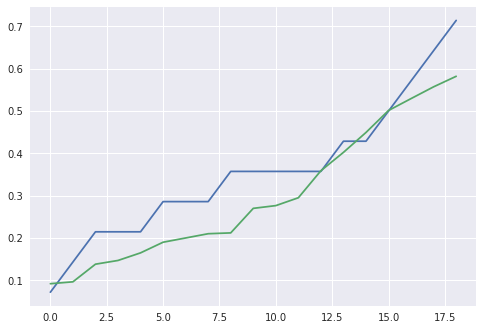

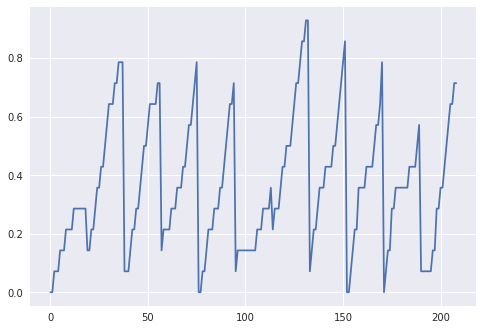

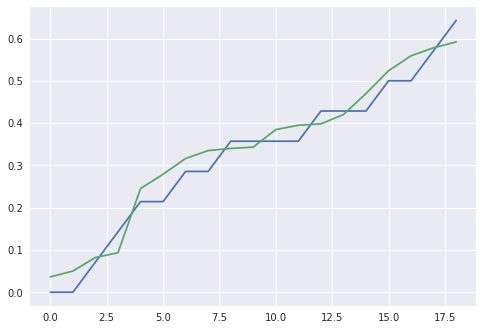

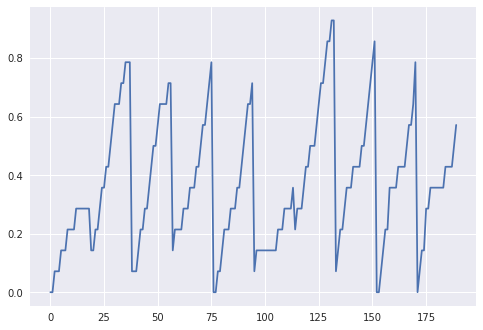

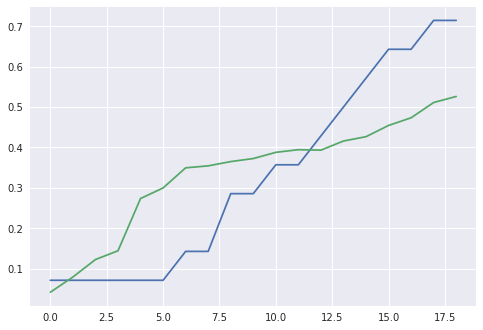

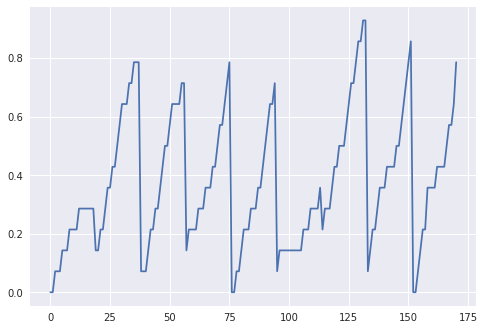

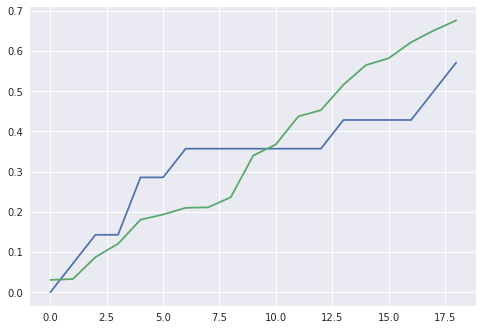

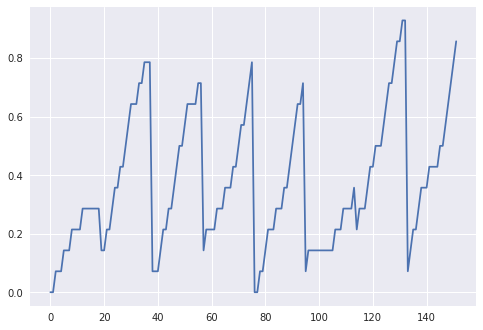

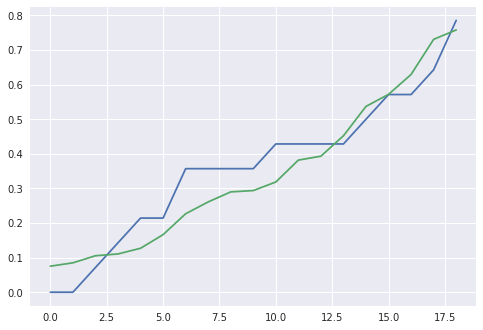

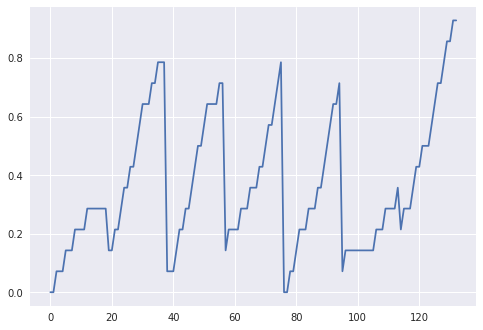

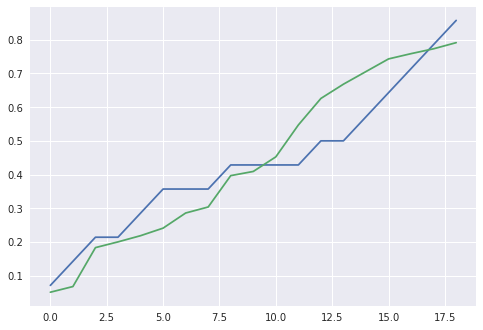

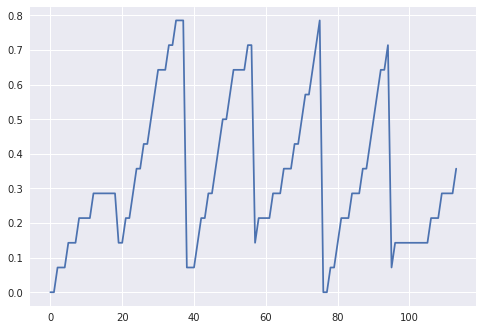

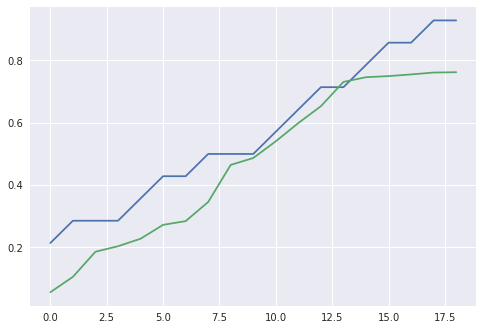

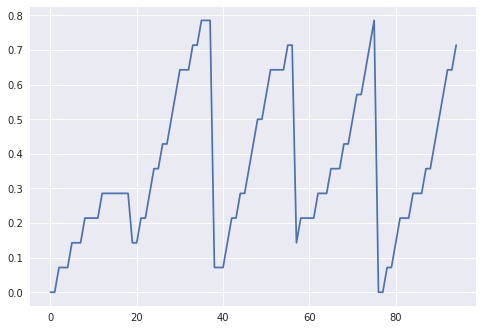

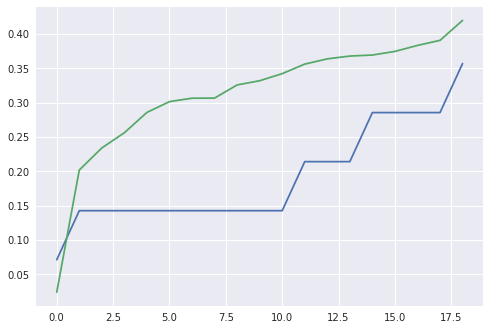

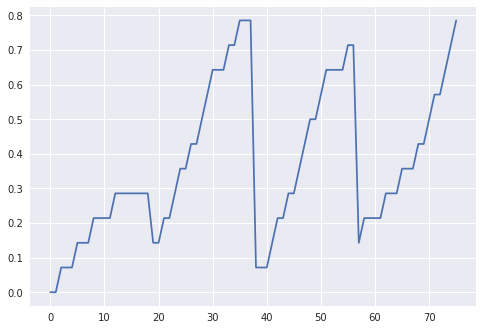

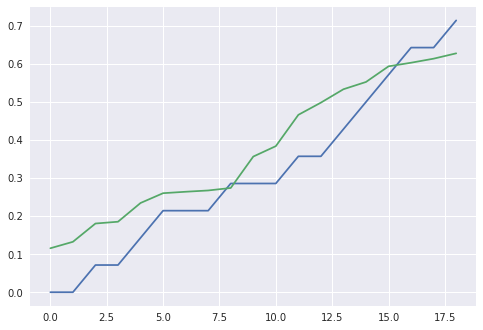

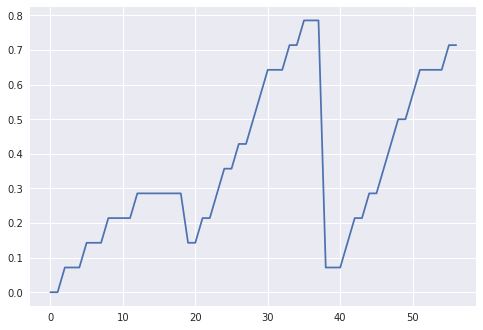

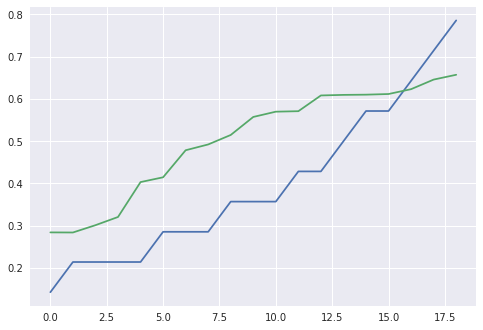

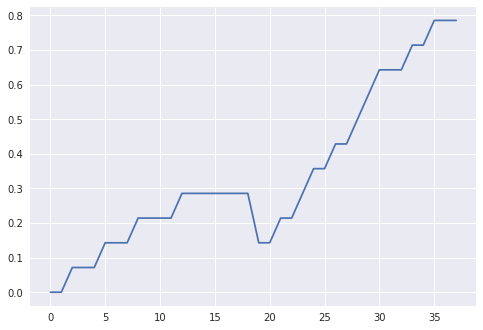

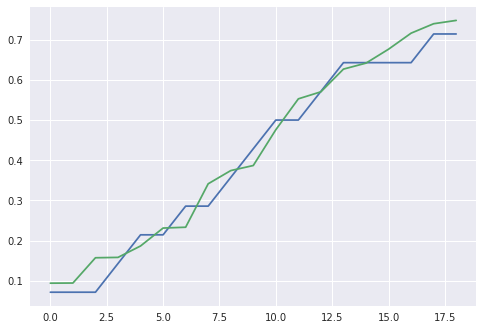

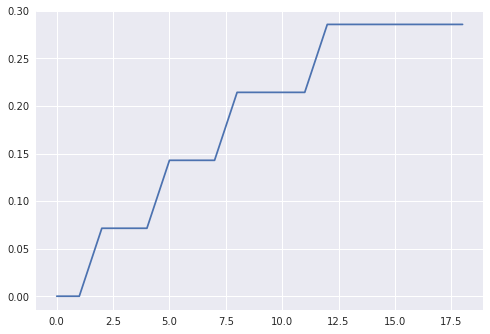

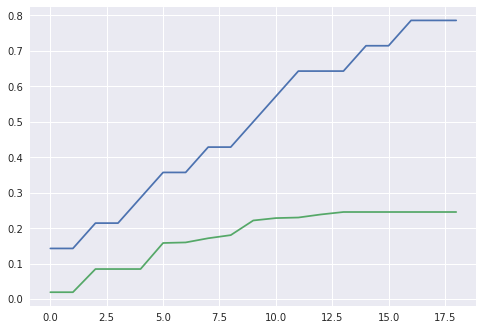

In [190]:
y_pred = {}
y_test = {}

i = 0
for batch in range(1, n_fold):
    X_train_1 = X[0:(len(X)-batch*n_splits)]
    y_train_1 = y[0:(len(X)-batch*n_splits)]
    X_test_1  = X[(len(X)-batch*n_splits):((len(X)-batch*n_splits)+n_splits)]
    y_test_1  = y[(len(X)-batch*n_splits):((len(X)-batch*n_splits)+n_splits)]
    print(len(X_train_1))

    y_pred[i] = classifier.fit(X_train_1, y_train_1).predict(X_test_1)
#     y_pred[i] = classifier.fit(X_train_1, y_train_1).predict(X_test_1[0:10])
#     y_pred[i] = classifier.fit(X_train_1, y_train_1).predict(X_test_1[10:19])
    y_test[i] = y_test_1  
    plt.figure()
    plt.plot(y_train_1)
    plt.plot()
    plt.figure()
    plt.plot(y_test[i])
    plt.plot(y_pred[i])
    plt.plot()
    i += 1

In [191]:
k = []
for i in range(0, len(y_test)):
    k.append(np.mean(np.sqrt(np.square(y_test[i] - y_pred[i]))))

k_mean = np.mean(k)

print(k_mean)
print()
print(k)

0.0932085769981

[0.097360902255640355, 0.050368421052630639, 0.044195488721805704, 0.045408521303257052, 0.14216040100250449, 0.080864661654136069, 0.063418546365914708, 0.033654135338345458, 0.11887719298245478, 0.094203007518795442, 0.06029824561403458, 0.067964912280699716, 0.099228070175438415, 0.12616541353383295, 0.077739348370927872, 0.12738596491228044, 0.032593984962407903, 0.31586716791980074]


In [174]:
y_pred_df = pd.DataFrame.from_dict(y_pred)

In [175]:
y_pred_df.columns=['month 7','month 6','month 5','month 4','month 3','month 2','month 1']

In [176]:
y_pred_df.to_csv('bid_results_v001.csv', index=False)

In [177]:
y_pred_df

,month 7,month 6,month 5,month 4,month 3,month 2,month 1
0,0.143524,0.094619,0.105238,0.096524,0.061429,0.082810,0.096381
1,0.158667,0.128143,0.112143,0.138524,0.073619,0.097905,0.100667
2,0.234286,0.178810,0.207905,0.186095,0.102762,0.133429,0.142476
3,0.265524,0.186000,0.338857,0.179762,0.191429,0.164095,0.146905
4,0.300048,0.194619,0.364762,0.175143,0.225286,0.217000,0.166429
5,0.318810,0.208857,0.389571,0.188048,0.272143,0.251905,0.192381
6,0.363524,0.266286,0.405429,0.195476,0.317048,0.335095,0.202429
7,0.393429,0.275286,0.419571,0.222857,0.328571,0.405095,0.207048
8,0.406095,0.294952,0.424905,0.237619,0.346619,0.451619,0.211429
9,0.474048,0.294810,0.457000,0.317048,0.356333,0.478429,0.267810


In [ ]:
cv = StratifiedKFold(n_splits=2, shuffle=False)

In [ ]:
# n_splits=6
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=3, shuffle=False)

# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])

y_pred = {}
y_test = {}

i = 0
for (train, test) in cv.split(X, y):
#     if i==0: print(X[train])
#         probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    y_pred[i] = classifier.fit(X[train], y[train]).predict(X[test])
    y_test[i] = y[test]    
    plt.figure()
    plt.plot(y[train])
    plt.plot()
    plt.figure()
    plt.plot(y_test[i])
    plt.plot(y_pred[i])
    plt.plot()
    i += 1

In [ ]:
k = []
for i in range(0, len(y_test)):
    k.append(np.mean(np.sqrt(np.square(y_test[i] - y_pred[i]))))

k_mean = np.mean(k)

print(k_mean)
print()
print(k)

In [ ]:
plt.plot(y_test[0])
plt.plot(y_pred[0])
plt.plot()

### ROC
<img align="left" src='./ref/ROC_curves.svg.png' width=50%>

---

### The End